# SETTING UP FOR FIRST TIME

###1. Mount the google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


###2. Create a symbolic link to the google drive so that we need not enter the entire path everytime

In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

###3. Create a directory for training and navigate into it.

In [ ]:
%cd /mydrive/rick_and_morty_training

[Errno 2] No such file or directory: '/mydrive/rick_and_morty_training'
/content


###3.a. Create a folder called 'backup' within the directory. This will be useful in the future

###4. Clone the darknet repository from github

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.69 MiB | 6.82 MiB/s, done.
Resolving deltas: 100% (10404/10404), done.
Checking out files: 100% (2044/2044), done.


###5. Edit the makefile to make the build use OpenCV, Cuda etc.

In [ ]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/rick_and_morty_training/darknet


###6. Make

In [ ]:
!make

###7. Navigate into the darknet folder (repository)

In [3]:
%cd /mydrive/rick_and_morty_training/darknet

/content/gdrive/My Drive/rick_and_morty_training/darknet


###8. Couple of steps to do before proceding to the code:
####i) Within darknet/cfg folder download yolov4-custom.cfg and edit the following:
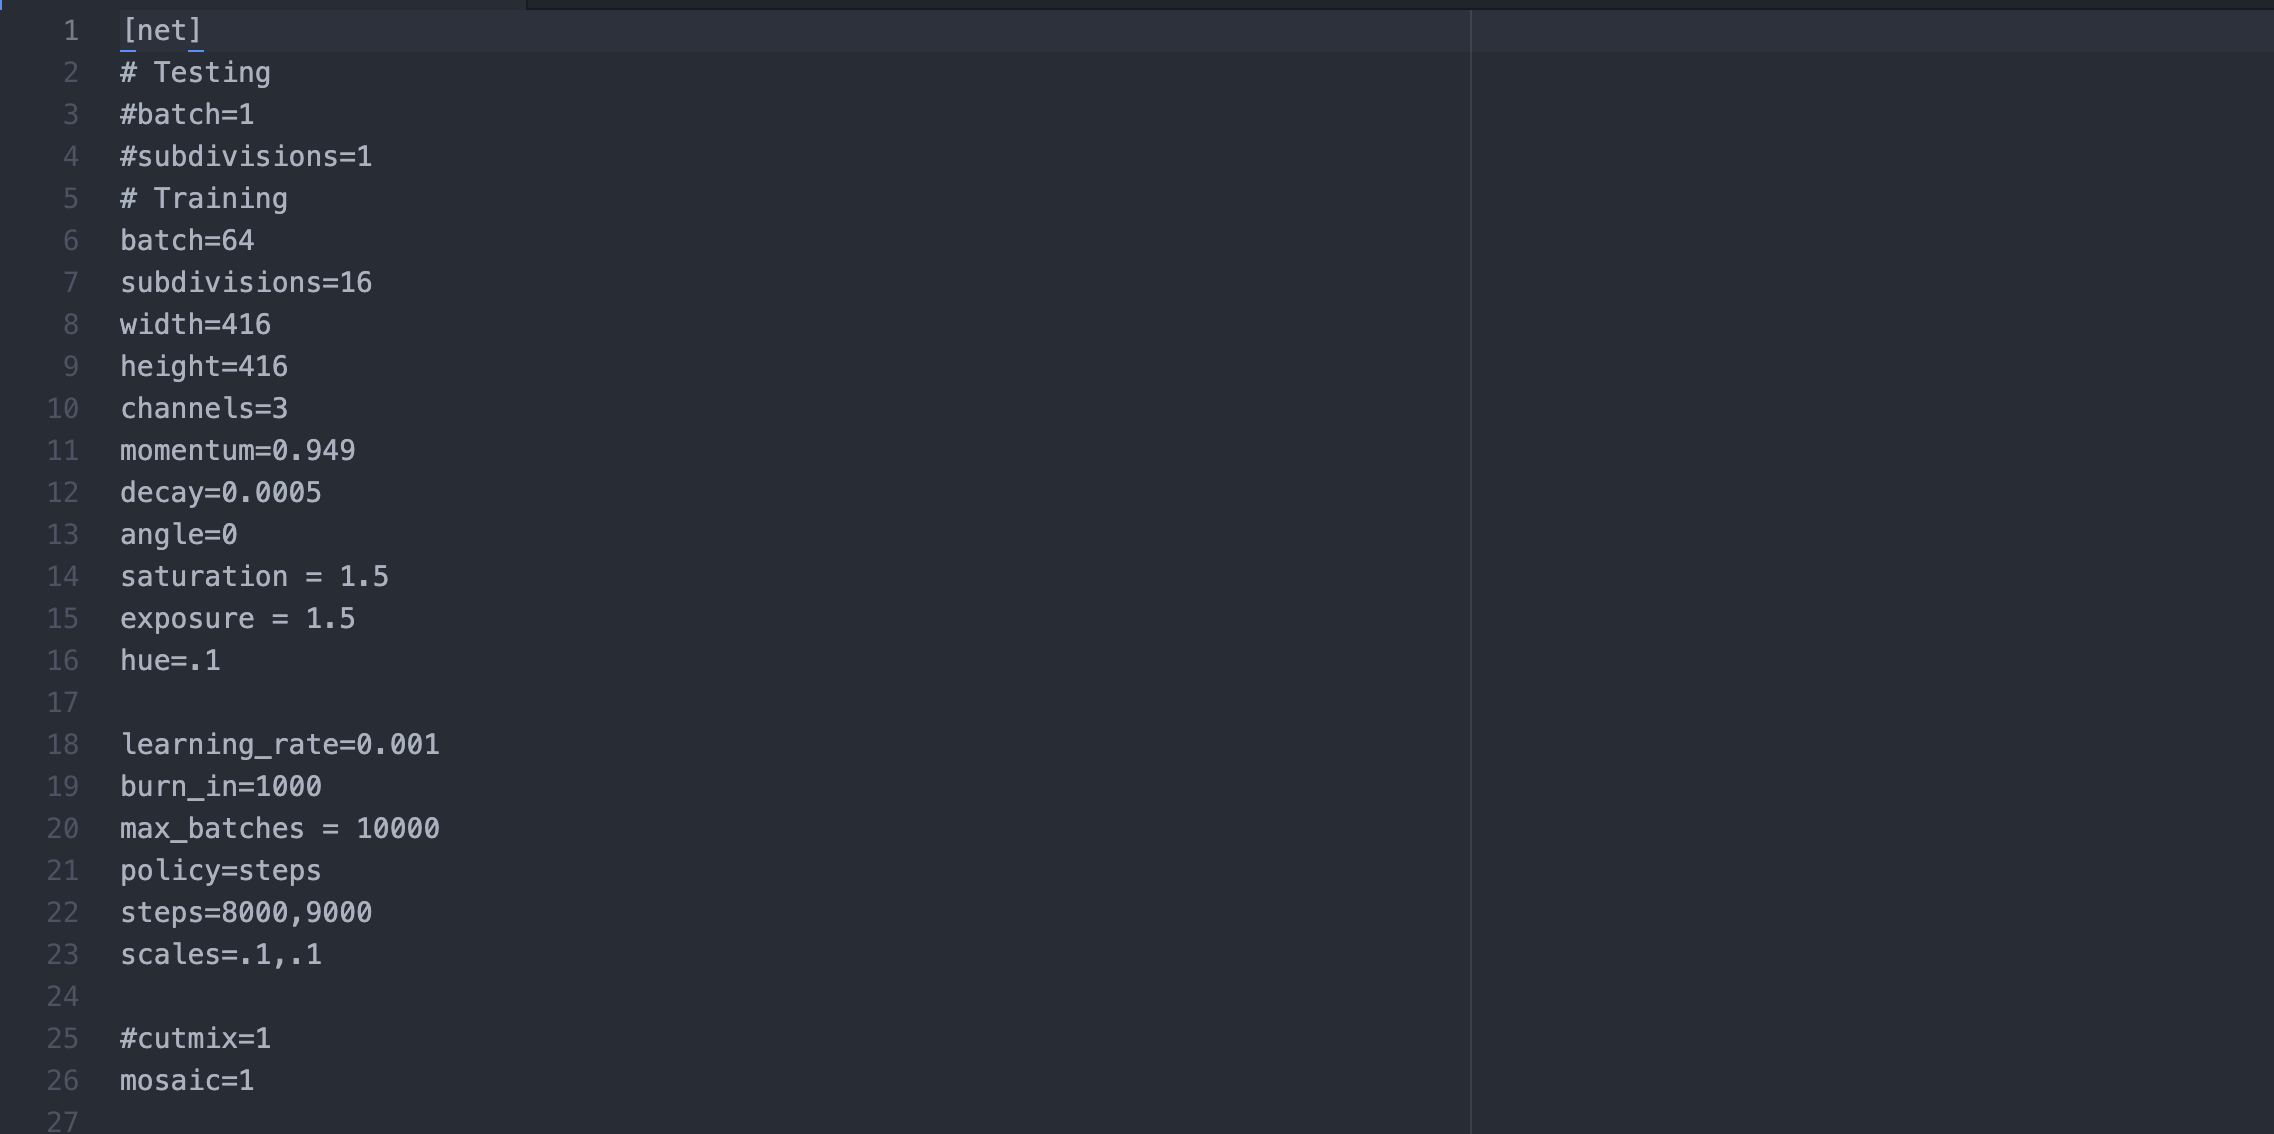

*   Under #Training: change batch=64 and subdivisions=16
*   Change max_batches to max(6000,#classes*2000) for example max_batches = 10000 for 5 classes
*   Change steps to 80% of max_batches , 90% of max_batches; for example if max_batches=10000, then steps=8000,9000
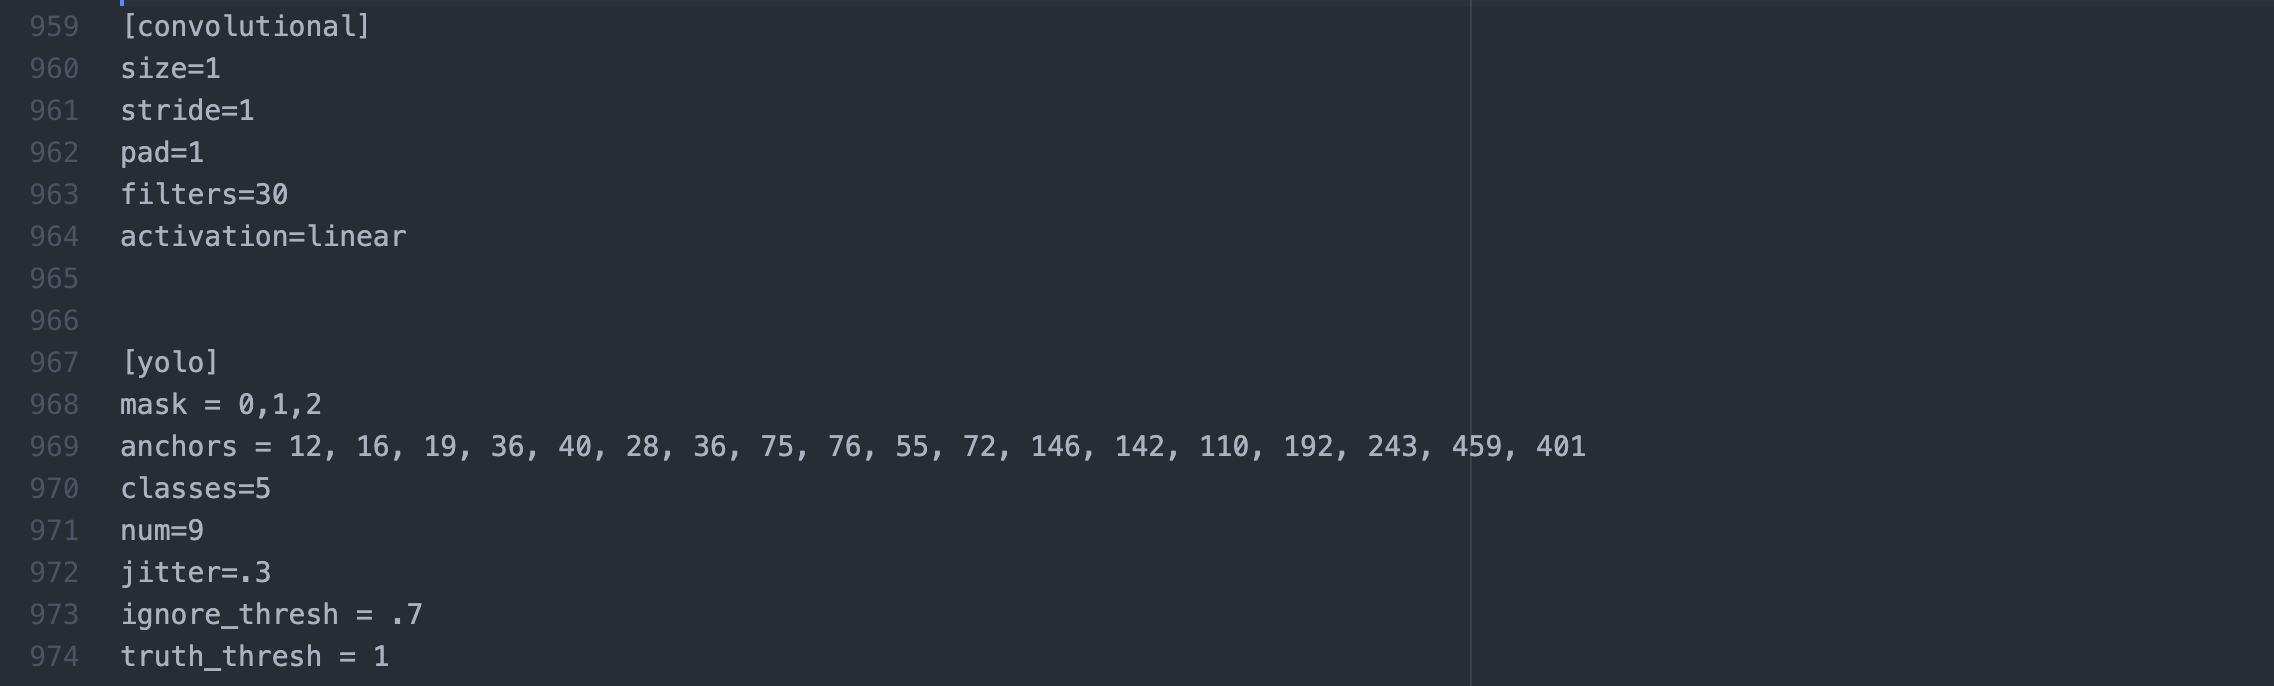
*   For each [convolution] layer before the [yolo] layer, change the filters to (#classes + 5)*3; for example: if #classes=5, then filters=30
*   For each [yolo] layer change the classes to the number of classes in the model

Note that the above two steps have to be done for each convolutional layer before the yolo layer and for each yolo layer in the config file

###ii) Rename the config file as yolov4-obj.cfg
###iii) Delete all the files and folders from darknet/cfg and upload yolov4-obj.cfg into this folder



###9. Assuming that the images have been annotated according to yolov4 format, split the entire set into train set and test set. Put the train images and label files into a folder called obj/ and zip it, and test images and label files into a folder called test/ and zip it.

###10. Upload obj.zip and test.zip into the project folder

###11. Run the following command from within the darknet folder

In [ ]:
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

###12. Create a file named obj.names and fill it with the class names in the same order in which the images were annotated. Upload it in darknet/data folder

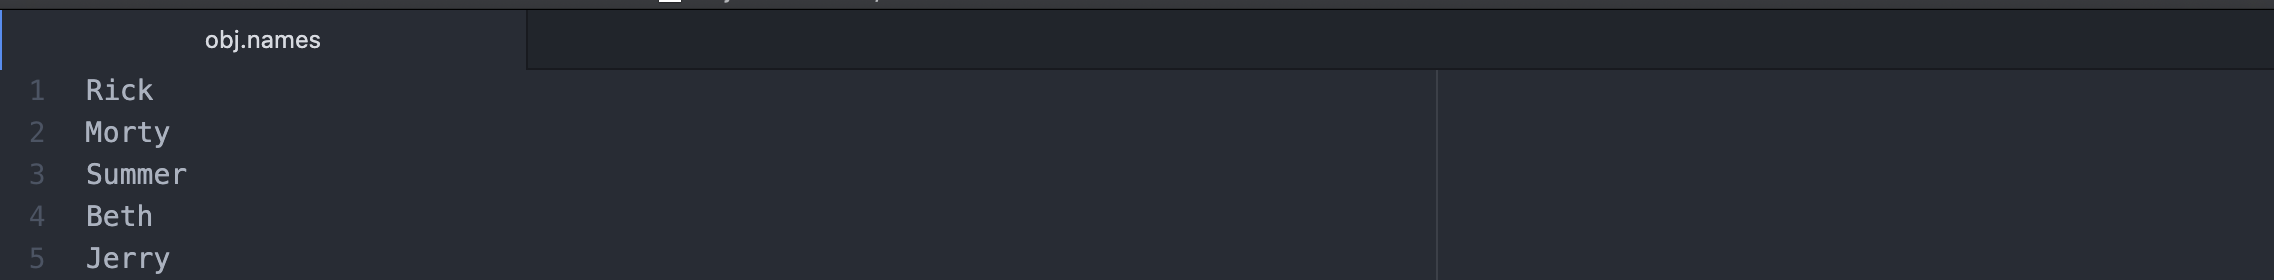

###13. Create a file named obj.data and in each line like shown in the image, mention the number of classes in the model. Fill the rest of the values as shown in the picture below. Upload it in darknet/data folder.

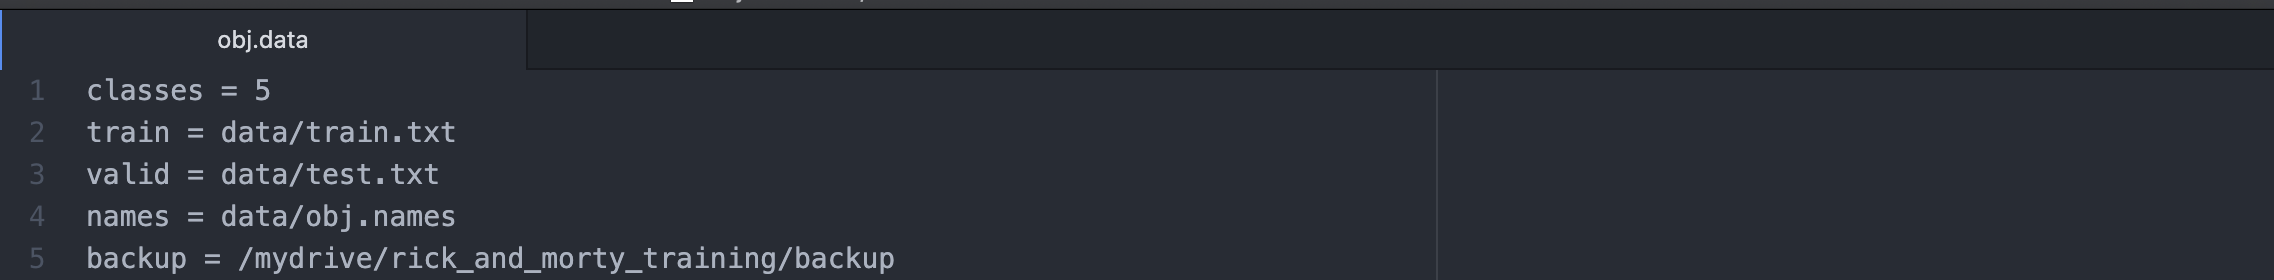

###14. Run the following files from inside the darknet folder to create the train.txt and test.txt

In [ ]:
!python generate_train.py
!python generate_test.py

###15. Download the yolov4 pre-trained weights (this has not been done for this dataset, but for normal object detection, this is highly recommended)


In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

###16. Change permission of darknet file to become an executable

In [4]:
!chmod +x ./darknet

###17. Train the model!!
Remove the yolov4.conv.137 to train without the pre-trained weights

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

#To continue training using saved weights do the following

###1. Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

###2. Create a symlink

In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

###3. Navigate into darknet folder

In [ ]:
%cd /mydrive/rick_and_morty_training/darknet

###4. Change darknet file permission

In [ ]:
!chmod +x ./darknet

###5. Resume training

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/rick_and_morty_training/backup/yolov4-obj_last.weights -dont_show

#To test the model after training is done

###1. Mount drive, create symlink, navigate into darknet folder and change darknet file permission if necessary

###2. Define a function like below to display the image

In [6]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

###3. Run the following command replacing the file path to the test image to be tested. Change the threshold if needed

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/rick_and_morty_training/backup/yolov4-obj_last.weights /mydrive/rick_and_morty_training/test/rm_img_33361_1.jpeg -thresh 0.3
imShow('predictions.jpg')

##For predicting a video:
###1. Download darknet_video.py and edit it
###2. Replace "MJPG" with 'mp4v' within the file
###3. Save and upload the darknet_video.py in its original place
###4. Run the following command replacing the output file path and input file path

In [ ]:
!python darknet_video.py --input /mydrive/rick_and_morty_training/test/rm_test.mp4 --out_filename output.mp4 --weights /mydrive/rick_and_morty_training/backup/yolov4-obj_last.weights --config_file cfg/yolov4-obj.cfg --data_file data/obj.data --thresh 0.3 --dont_show